# Learning dynamics

In this notebook, we provide a brief discussion of learning dynamics – of how players might learn to play a Nash equilibrium over time, while repeatedly playing a game. We will look at two simple learning dynamics: _Best response dynamics_ and _fictitious play_. We will also look at _damped_ versions of these dynamics.

In [1]:
import numpy
import matplotlib.pyplot as plt

----

In [32]:
# payoff matrix for the two players in the 2x2 game
# first two rows are player 1's payoff matrix, and the last two player 2's

payoff_matrix = numpy.zeros([4,2])

# matching pennies
payoff_matrix[:2,:] = [[1, -1],
                       [-1, 1]]
payoff_matrix[2:,:] = [[-1, 1],
                       [1, -1]]
                       
# coordination game
#payoff_matrix[:2,:] = [ [1, 0], [0, 2]]
#payoff_matrix[2:,:] = [ [2, 0], [0, 1]]


# prisoner's dilemma
#payoff_matrix[:2,:] = [ [-1, -10], [0, -5]]
#payoff_matrix[2:,:] = [ [-1, 0], [-10, -5]]

# random game (with positive payoffs in [0,1])
payoff_matrix = numpy.random.rand(4,2)

## Best response dynamics

The simplest learning dynamics one might consider is where each player plays a best response to what
was played by other players the last time they played the game. For example, in a Cournot competition
setting where two firms compete with each other every day, each firm might decide to play the best
response to the quantity the other firm produced the previous day. This process is called the best
response dynamics.


In [33]:
num_iter = 20
strategy = numpy.zeros([num_iter,3])
payoffs = numpy.zeros([2,2])


for i in range(1,num_iter):

    # calculate payoff of player 1 assuming the other player plays according to empirical dist.
    payoffs[0,0] = (1- strategy[i-1,1])*payoff_matrix[0,0] + strategy[i-1,1]*payoff_matrix[0,1]
    payoffs[1,0] = (1- strategy[i-1,1])*payoff_matrix[1,0] + strategy[i-1,1]*payoff_matrix[1,1]

    # calculate payoff of player 2 assuming the other player plays according to empirical dist.
    payoffs[0,1] = (1-strategy[i-1,0])*payoff_matrix[2,0] + strategy[i-1,0]*payoff_matrix[3,0]
    payoffs[1,1] = (1-strategy[i-1,0])*payoff_matrix[2,1] + strategy[i-1,0]*payoff_matrix[3,1]


    # player 1's best response
    if payoffs[0,0] < payoffs[1,0]:
        strategy[i,0] = 1
    elif payoffs[0,0] > payoffs[1,0]:
        strategy[i,0] = 0
    else:
        strategy[i,0] = strategy[i-1,0]


    # player 2's best response
    if  payoffs[0,1] < payoffs[1,1]:
        strategy[i,1] = 1
    elif payoffs[0,1] > payoffs[1,1]:
        strategy[i,1] = 0
    else:
        strategy[i,1] = strategy[i-1,1]


    # store the (normalized) number of iterations
    strategy[i,2] = i/num_iter

# save files
# numpy.savetxt('strategy', strategy)

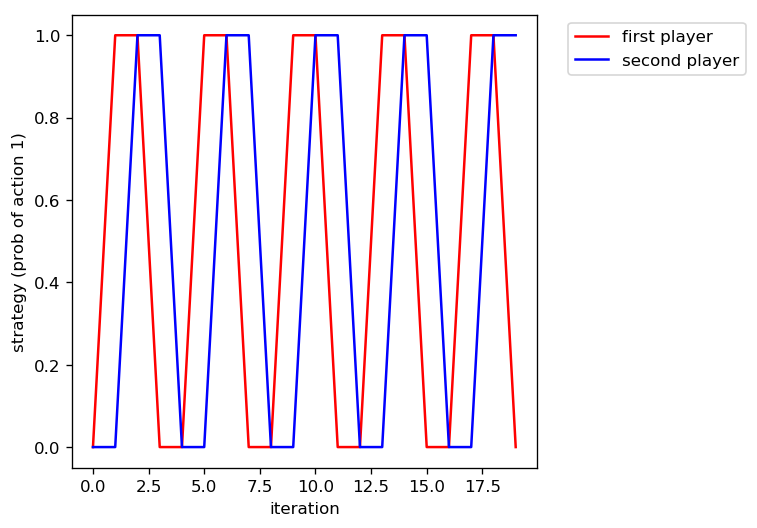

In [34]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],'r',label="first player")
plt.plot(strategy[:,1],'b',label="second player")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy (prob of action 1)")
plt.show()

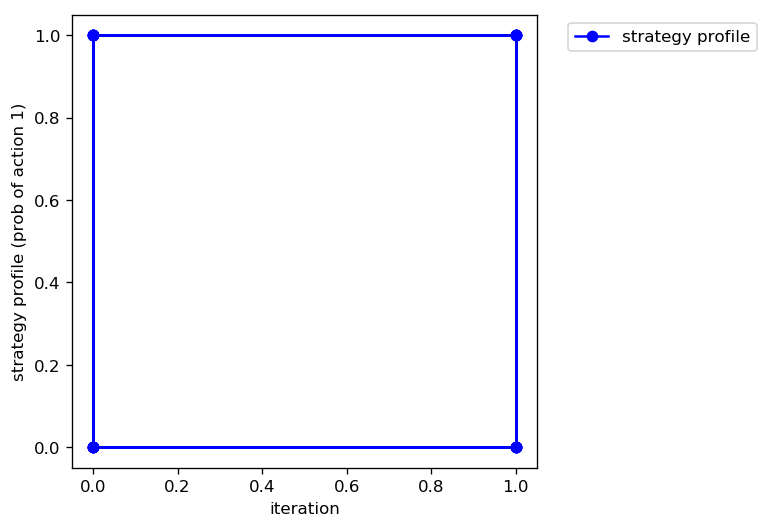

In [16]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],strategy[:,1],'bo-',label="strategy profile")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy profile (prob of action 1)")
plt.show()

## Damped best response dynamics

In [17]:
# damping factor
alpha = 0.1

# number of iterations
num_iter = 1500

# 'strategy' stores the strategy played in each time period
strategy = numpy.zeros([num_iter,3])

payoffs = numpy.zeros([2,2])

for i in range(1,num_iter):

    # calculate payoff of player 1 assuming the other player plays according to empirical dist.
    payoffs[0,0] = (1- strategy[i-1,1])*payoff_matrix[0,0] + strategy[i-1,1]*payoff_matrix[0,1]
    payoffs[1,0] = (1- strategy[i-1,1])*payoff_matrix[1,0] + strategy[i-1,1]*payoff_matrix[1,1]

    # calculate payoff of player 2 assuming the other player plays according to empirical dist.
    payoffs[0,1] = (1-strategy[i-1,0])*payoff_matrix[2,0] + strategy[i-1,0]*payoff_matrix[3,0]
    payoffs[1,1] = (1-strategy[i-1,0])*payoff_matrix[2,1] + strategy[i-1,0]*payoff_matrix[3,1]


    # player 1's best response with damping
    if payoffs[0,0] < payoffs[1,0]:
        strategy[i,0] = (1-alpha)*strategy[i-1,0] + alpha*1
    elif payoffs[0,0] > payoffs[1,0]:
        strategy[i,0] = (1-alpha)*strategy[i-1,0] + alpha*0
    else:
        strategy[i,0] = strategy[i-1,0]


    # player 2's best response with damping
    if  payoffs[0,1] < payoffs[1,1]:
        strategy[i,1] = (1-alpha)*strategy[i-1,1] + alpha*1
    elif payoffs[0,1] > payoffs[1,1]:
        strategy[i,1] = (1-alpha)*strategy[i-1,1] + alpha*0
    else:
        strategy[i,1] = strategy[i-1,1]


    # store the (normalized) number of iterations
    strategy[i,2] = i/num_iter

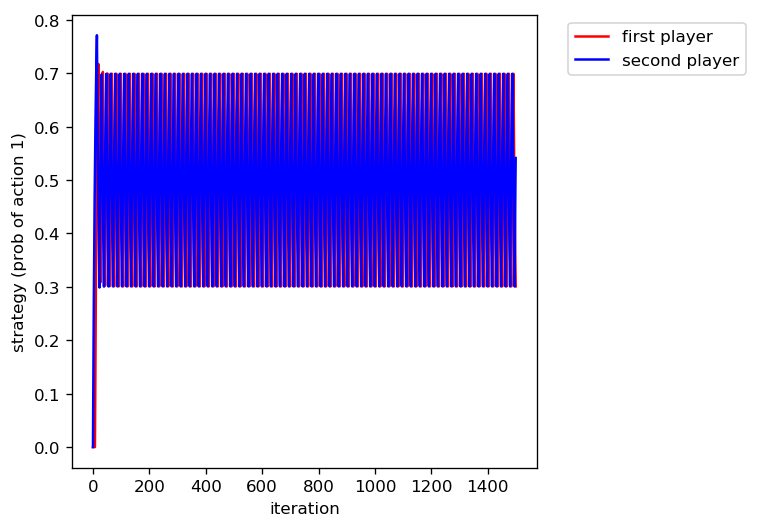

In [7]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],'r',label="first player")
plt.plot(strategy[:,1],'b',label="second player")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy (prob of action 1)")
plt.show()

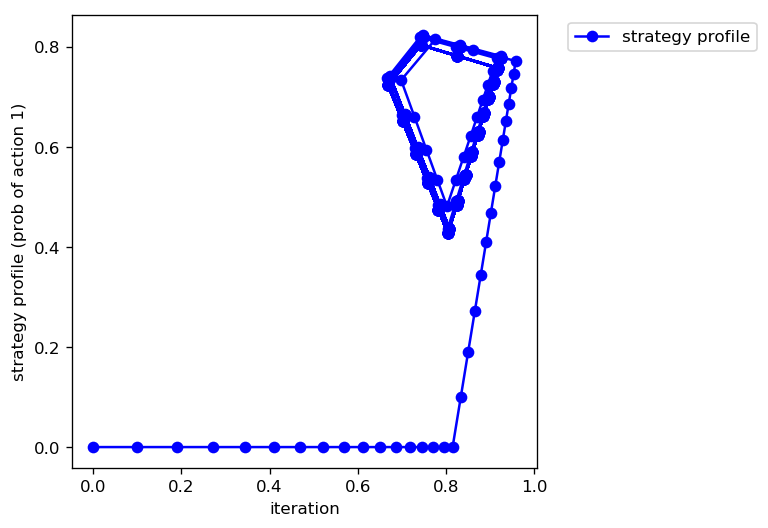

In [18]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],strategy[:,1],'bo-',label="strategy profile")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy profile (prob of action 1)")
plt.show()

## Fictitious Play

In [35]:
num_iter = 1000
strategy = numpy.zeros([num_iter,3])
empirical = numpy.zeros([num_iter,3])
payoffs = numpy.zeros([2,2])

for i in range(1,num_iter):
    
    # calculate payoff of player 1 assuming the other player plays according to empirical dist.
    payoffs[0,0] = (1-empirical[i-1,1])*payoff_matrix[0,0] + empirical[i-1,1]*payoff_matrix[0,1]
    payoffs[1,0] = (1-empirical[i-1,1])*payoff_matrix[1,0] + empirical[i-1,1]*payoff_matrix[1,1]

    # calculate payoff of player 2 assuming the other player plays according to empirical dist.
    payoffs[0,1] = (1-empirical[i-1,0])*payoff_matrix[2,0] + empirical[i-1,0]*payoff_matrix[3,0]
    payoffs[1,1] = (1-empirical[i-1,0])*payoff_matrix[2,1] + empirical[i-1,0]*payoff_matrix[3,1]


    # player 1's best response
    if payoffs[0,0] < payoffs[1,0]:
        strategy[i,0] = 1
    elif payoffs[0,0] > payoffs[1,0]:
        strategy[i,0] = 0
    else:
        strategy[i,0] = strategy[i-1,0]


    # player 2's best response
    if  payoffs[0,1] < payoffs[1,1]:
        strategy[i,1] = 1
    elif payoffs[0,1] > payoffs[1,1]:
        strategy[i,1] = 0
    else:
        strategy[i,1] = strategy[i-1,1]


    # update the empirical distribution
    empirical[i,0] = ((i-1)*empirical[i-1,0] + strategy[i,0])/i
    empirical[i,1] = ((i-1)*empirical[i-1,1] + strategy[i,1])/i
        
    # store the (normalized) number of iterations
    strategy[i,2] = i/num_iter
    empirical[i,2] = i/num_iter

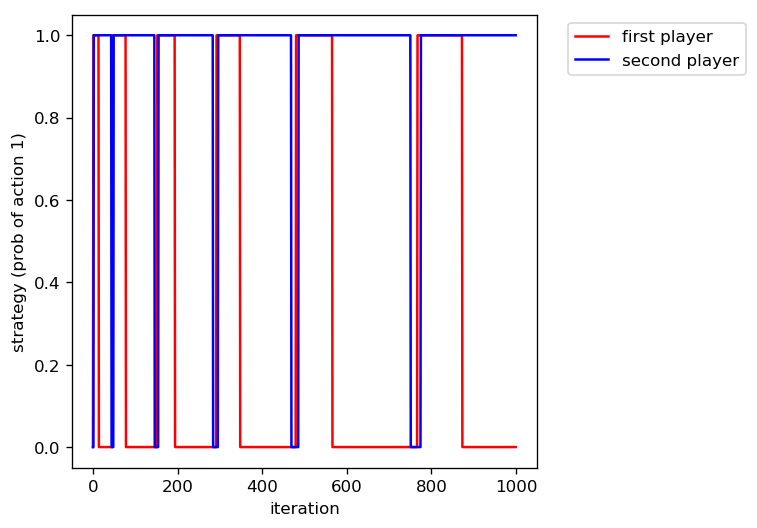

In [36]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],'r',label="first player")
plt.plot(strategy[:,1],'b',label="second player")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy (prob of action 1)")
plt.show()

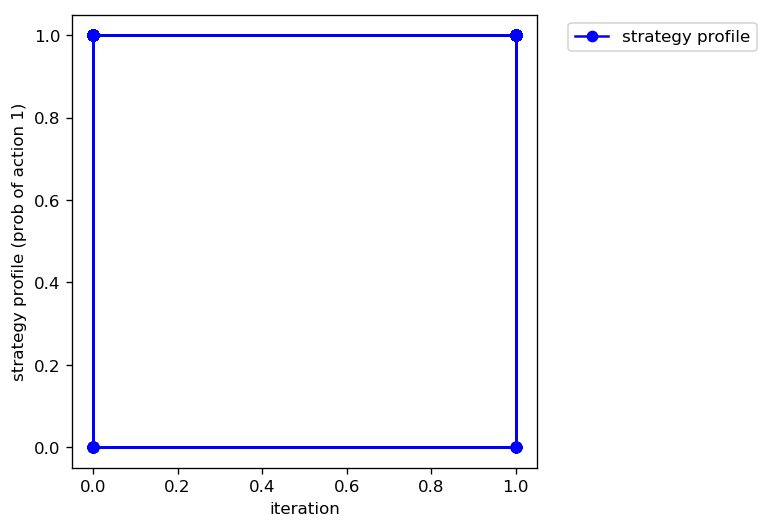

In [37]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],strategy[:,1],'bo-',label="strategy profile")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy profile (prob of action 1)")
plt.show()

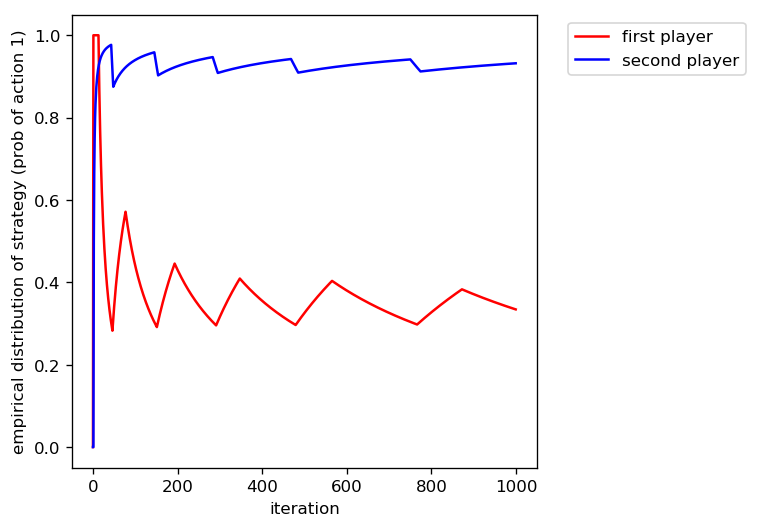

In [38]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(empirical[:,0],'r',label="first player")
plt.plot(empirical[:,1],'b',label="second player")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("empirical distribution of strategy (prob of action 1)")
plt.show()

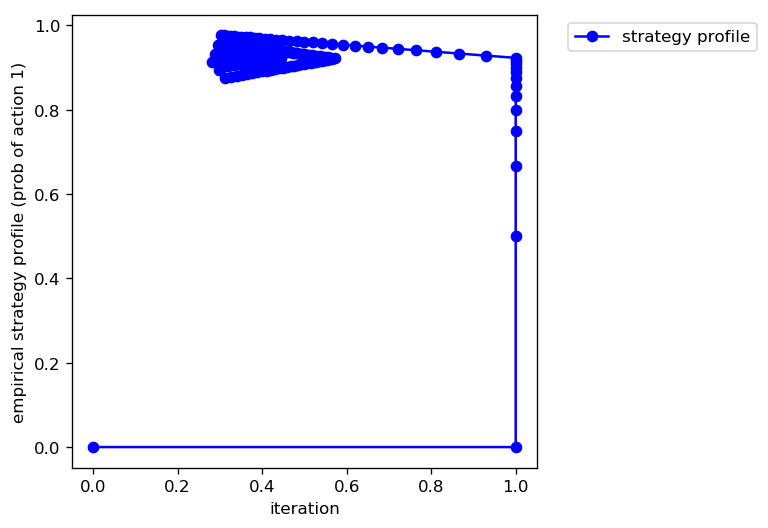

In [39]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(empirical[:,0],empirical[:,1],'bo-',label="strategy profile")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("empirical strategy profile (prob of action 1)")
plt.show()

# Damped fictitious play

In [40]:
# number of iterations
num_iter = 15000

# 'strategy' stores the strategy played in each time period
strategy = numpy.zeros([num_iter,3])

# 'empirical' stores the empirical distribution at each time period
empirical = numpy.zeros([num_iter,3])

# 'payoffs' stores the payoff for each player, assuming the other
# player plays according to the empirical distribution
payoffs = numpy.zeros([2,2])

In [26]:
# damping factor
alpha = 0.4

In [41]:
for i in range(1,num_iter):
    
    # calculate payoff of player 1 assuming the other player plays according to empirical dist.
    payoffs[0,0] = (1-empirical[i-1,1])*payoff_matrix[0,0] + empirical[i-1,1]*payoff_matrix[0,1]
    payoffs[1,0] = (1-empirical[i-1,1])*payoff_matrix[1,0] + empirical[i-1,1]*payoff_matrix[1,1]

    # calculate payoff of player 2 assuming the other player plays according to empirical dist.
    payoffs[0,1] = (1-empirical[i-1,0])*payoff_matrix[2,0] + empirical[i-1,0]*payoff_matrix[3,0]
    payoffs[1,1] = (1-empirical[i-1,0])*payoff_matrix[2,1] + empirical[i-1,0]*payoff_matrix[3,1]


    # player 1's best response with damping
    if payoffs[0,0] < payoffs[1,0]:
        strategy[i,0] = (1-alpha)*strategy[i-1,0] + alpha*1
    elif payoffs[0,0] > payoffs[1,0]:
        strategy[i,0] = (1-alpha)*strategy[i-1,0] + alpha*0
    else:
        strategy[i,0] = strategy[i-1,0]


    # player 2's best response with damping
    if  payoffs[0,1] < payoffs[1,1]:
        strategy[i,1] = (1-alpha)*strategy[i-1,1] + alpha*1
    elif payoffs[0,1] > payoffs[1,1]:
        strategy[i,1] = (1-alpha)*strategy[i-1,1] + alpha*0
    else:
        strategy[i,1] = strategy[i-1,1]


    # update the empirical distribution
    empirical[i,0] = ((i-1)*empirical[i-1,0] + strategy[i,0])/i
    empirical[i,1] = ((i-1)*empirical[i-1,1] + strategy[i,1])/i
        
    # store the (normalized) number of iterations
    strategy[i,2] = i/num_iter
    empirical[i,2] = i/num_iter

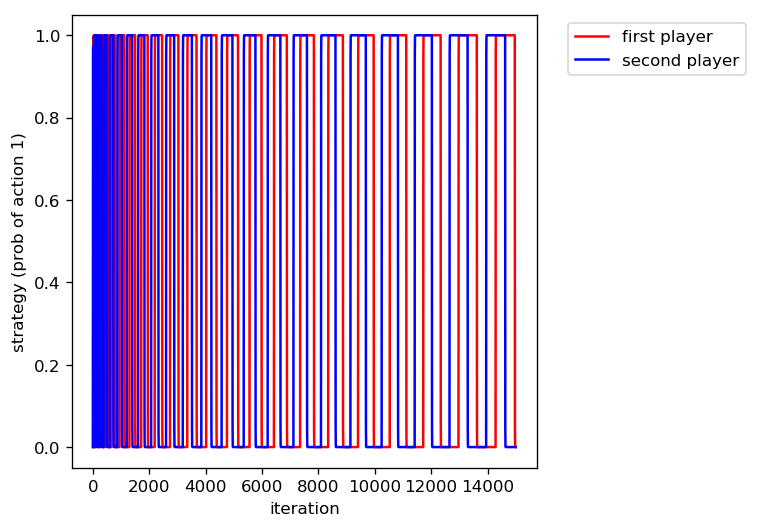

In [28]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],'r',label="first player")
plt.plot(strategy[:,1],'b',label="second player")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy (prob of action 1)")
plt.show()

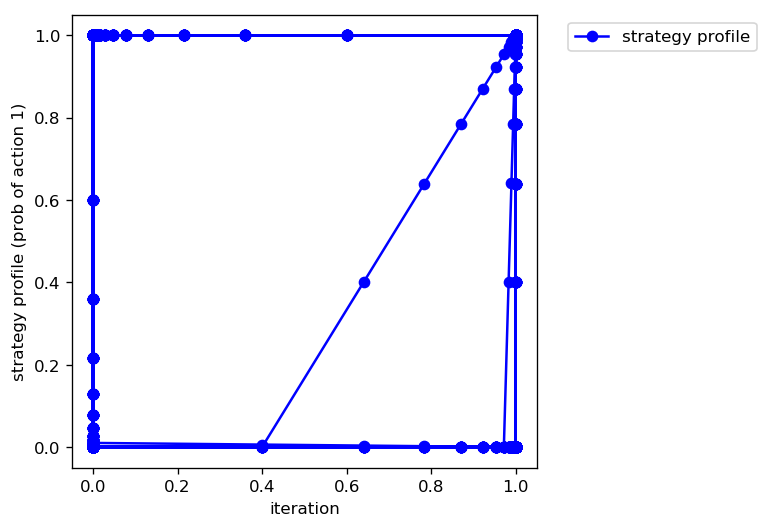

In [42]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(strategy[:,0],strategy[:,1],'bo-',label="strategy profile")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("strategy profile (prob of action 1)")
plt.show()

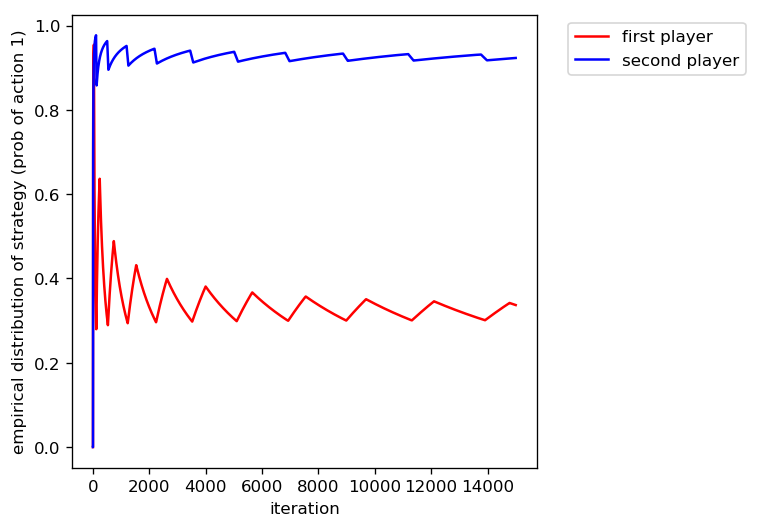

In [43]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(empirical[:,0],'r',label="first player")
plt.plot(empirical[:,1],'b',label="second player")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("empirical distribution of strategy (prob of action 1)")
plt.show()

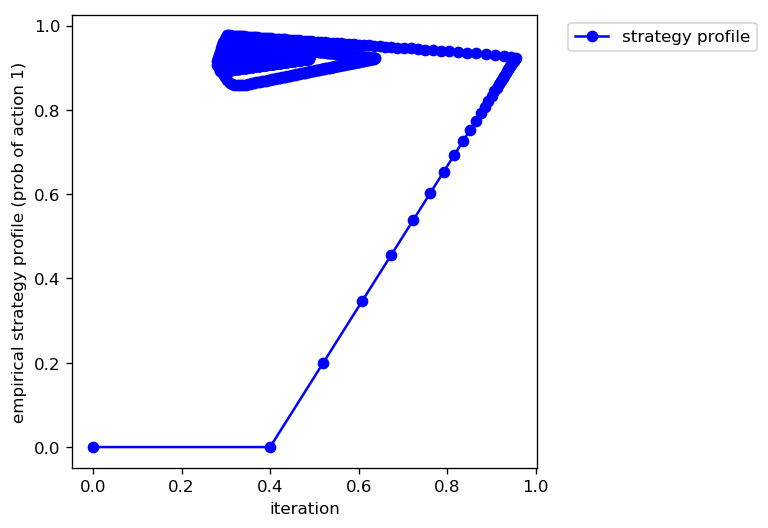

In [44]:
plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(empirical[:,0],empirical[:,1],'bo-',label="strategy profile")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.xlabel("iteration")
plt.ylabel("empirical strategy profile (prob of action 1)")
plt.show()